In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 
from PIL import ImageFont, ImageDraw, Image

In [29]:
img = np.array([
      [1,2,3],
    [200,5,200],
    [7,8,9]
], dtype="float")

kernel = np.array([[0,0,0],
                   [1,0,-1],
                   [0,0,0]
                  ])
filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[ 0. -2.  0.]
 [ 0.  0.  0.]
 [ 0. -2.  0.]]


<img src= padding.jpg width=100>

In [28]:
cv2.imwrite("output.png", filtered.astype('uint8'))

img = cv2.imread("output.png")
print(img)

[[[  0   0   0]
  [254 254 254]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [254 254 254]
  [  0   0   0]]]


In [43]:
ma = np.max(filtered)
mm = np.min(filtered)

n = ( filtered - mm) / (np.ptp(filtered) ) * 255   #  -2  ~ 0 ->  0 ~ 255
print(n)


n2 =  np.abs(filtered) / np.max(np.abs(filtered))*255   # 0-2 ->  0  ~ 255
print(n2)

norm = cv2.normalize(filtered, None , 0, 255, cv2.NORM_MINMAX)
norm = norm.astype('uint8')

print(norm)

[[255.   0. 255.]
 [255. 255. 255.]
 [255.   0. 255.]]
[[  0. 255.   0.]
 [  0.   0.   0.]
 [  0. 255.   0.]]
[[255   0 255]
 [255 255 255]
 [255   0 255]]


In [54]:
src = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
src2 = src.astype('int16')

kernel = np.array([[0,+1,0],
                   [0,0,0],
                   [0,-1,0]
                  ])
filtered = cv2.filter2D(src2, -1, kernel) + 128
print(np.min(filtered))
print(np.max(filtered))
cv2.imwrite("output.png", filtered)


filtered2 = cv2.filter2D(src2, -1, kernel)
filtered2 = cv2.normalize(filtered2, None , 0, 255, cv2.NORM_MINMAX)
print(np.min(filtered2))
print(np.max(filtered2))
cv2.imwrite("output2.png", filtered2)



5
290
-123
162


True

In [57]:
src = cv2.imread('shape2.png', cv2.IMREAD_GRAYSCALE)
src2 = src.astype('int16')

kernel = np.array([[0,0,0],
                   [+1,0,-1],
                   [0,0,0]
                  ])
filtered = cv2.filter2D(src2, -1, kernel)
cv2.imwrite("output.png", filtered)

True

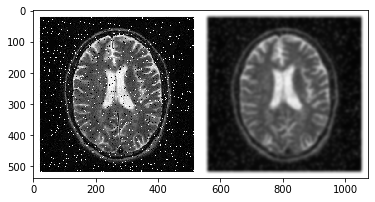

In [63]:
img = cv2.imread("brain.jpeg")
gauss = cv2.GaussianBlur(img, (25,25), 0)
plt.imshow(np.hstack([img, gauss ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


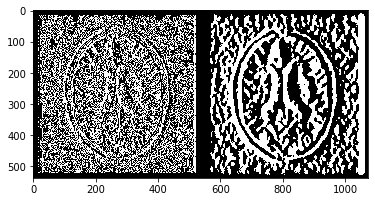

In [65]:
out1 = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
out2 = cv2.Sobel(gauss, cv2.CV_64F, 1, 0, ksize=3)

plt.imshow(np.hstack([out1, out2 ]))

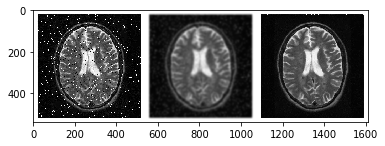

In [69]:
img = cv2.imread("brain.jpeg")
gauss = cv2.GaussianBlur(img, (25,25), 0)
median = cv2.medianBlur(img, 5)
plt.imshow(np.hstack([img,  gauss, median] )  )